In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep

from utils import *

import matplotlib 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.rc('font', size=16)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
filename = '/eos/user/a/aperego/tesi/histo_2pion_20891.root'
file = uproot.open(filename)

In [3]:
#file.keys()

In [4]:
simtrackstersSC = file["ticlNtuplizer/simtrackstersSC"]
simtrackstersCP = file["ticlNtuplizer/simtrackstersCP"]

In [5]:
#simtrackstersSC.keys()

In [6]:
SC_vx = simtrackstersSC["vertices_x"].array()
SC_vy = simtrackstersSC["vertices_y"].array()
SC_vz = simtrackstersSC["vertices_z"].array()
SC_ve = simtrackstersSC["vertices_energy"].array()
SC_vi = simtrackstersSC["vertices_indexes"].array()
SC_vt = simtrackstersSC["vertices_time"].array()

SC_bx = simtrackstersSC["barycenter_x"].array()
SC_by = simtrackstersSC["barycenter_y"].array()
SC_bz = simtrackstersSC["barycenter_z"].array()
SC_be = simtrackstersSC["raw_energy"].array()

CP_vx = simtrackstersCP["vertices_x"].array()
CP_vy = simtrackstersCP["vertices_y"].array()
CP_vz = simtrackstersCP["vertices_z"].array()
CP_ve = simtrackstersCP["vertices_energy"].array()
CP_vi = simtrackstersCP["vertices_indexes"].array()
CP_vt = simtrackstersSC["vertices_time"].array()

CP_bx = simtrackstersCP["barycenter_x"].array()
CP_by = simtrackstersCP["barycenter_y"].array()
CP_bz = simtrackstersCP["barycenter_z"].array()
CP_be = simtrackstersCP["raw_energy"].array()

CP_vm = simtrackstersCP["vertices_multiplicity"].array()
SC_vm = simtrackstersSC["vertices_multiplicity"].array()

In [7]:
SC_CALO_time = simtrackstersSC["time"].array()
SC_CALO_err = simtrackstersSC["timeError"].array()
SC_boundary_time = simtrackstersSC["BoundaryTime"].array()
SC_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
SC_MTD_time = simtrackstersSC["MTDtime"].array()
SC_MTD_err = simtrackstersSC["MTDtimeError"].array()

CP_CALO_time = simtrackstersSC["time"].array()
CP_CALO_err = simtrackstersSC["timeError"].array()
CP_boundary_time = simtrackstersSC["BoundaryTime"].array()
CP_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
CP_MTD_time = simtrackstersSC["MTDtime"].array()
CP_MTD_err = simtrackstersSC["MTDtimeError"].array()

In [8]:
print(f'There are {len(SC_CALO_time)} events in the file')

There are 300 events in the file


## Plot the times

In [9]:
def plot(X, bins=30, title='title', xlabel='time', ylabel='Counts'):
    plt.figure()
    plt.hist(ak.flatten(X)[np.where(ak.flatten(X)>-99)], bins=bins, color='dodgerblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

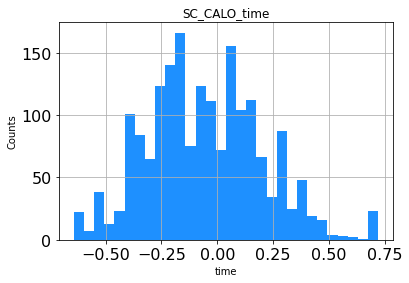

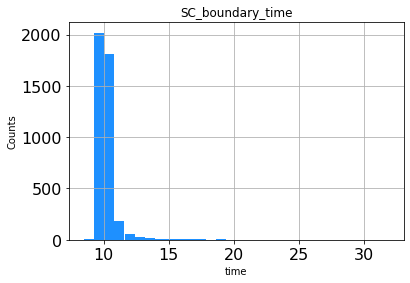

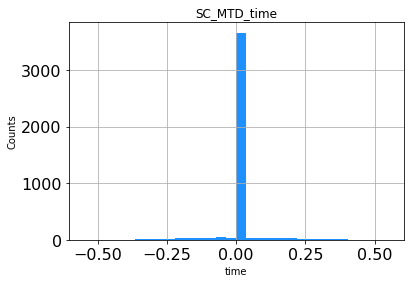

In [10]:
plot(SC_CALO_time, title='SC_CALO_time')
plot(SC_boundary_time, title='SC_boundary_time')
plot(SC_MTD_time, title='SC_MTD_time')

#plot(CP_CALO_time, title='CP_CALO_time')
#plot(CP_boundary_time, title='CP_boundary_time')
#plot(CP_MTD_time, title='CP_MTD_time')

In [11]:
def subplot(axs, X, bins=30, title='title', xlabel='time', ylabel='Counts'):
    axs.hist(ak.flatten(X)[np.where(ak.flatten(X)>-99)], bins=bins, color='dodgerblue')
    axs.set_title(title)
    axs.grid()

In [12]:
#ak.count(SC_CALO_time)
#ak.sum(SC_CALO_time>-98)//100
#len(ak.flatten(SC_MTD_time))

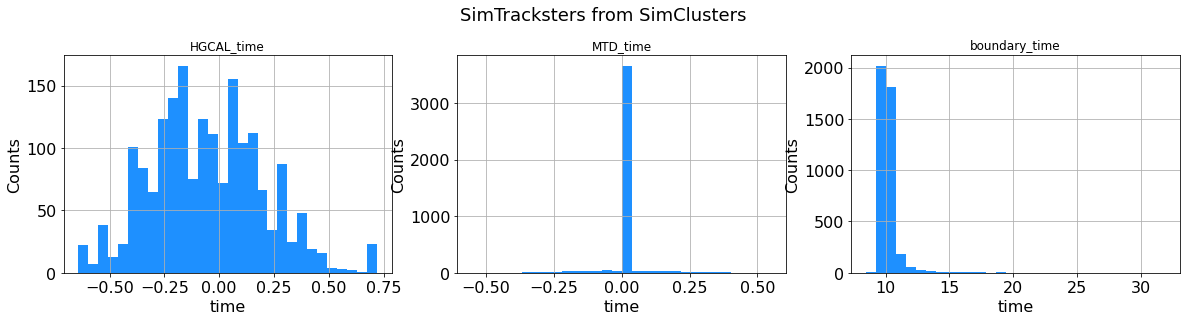

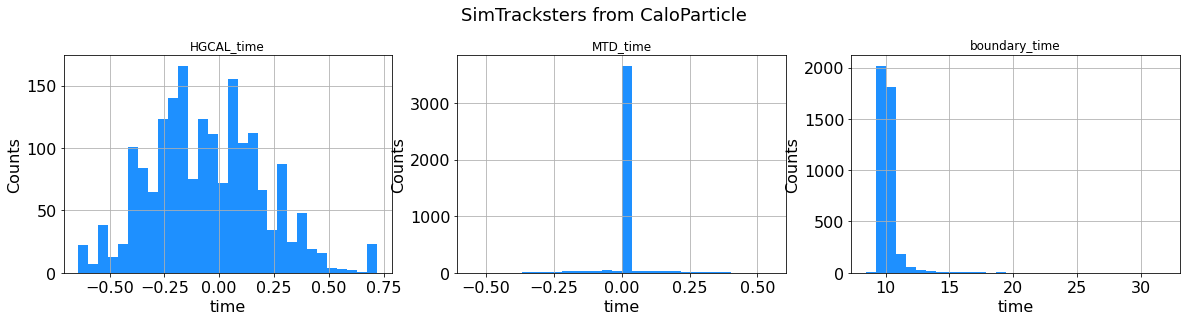

In [13]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,4))
fig.suptitle('SimTracksters from SimClusters', size=18, y=1.05)

subplot(axs[0], SC_CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], SC_MTD_time, title='MTD_time')
subplot(axs[2], SC_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)
#-------
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,4))
fig.suptitle('SimTracksters from CaloParticle\n ', size=18, y=1.05)

subplot(axs[0], CP_CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], CP_MTD_time, title='MTD_time')
subplot(axs[2], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

## Visual representation

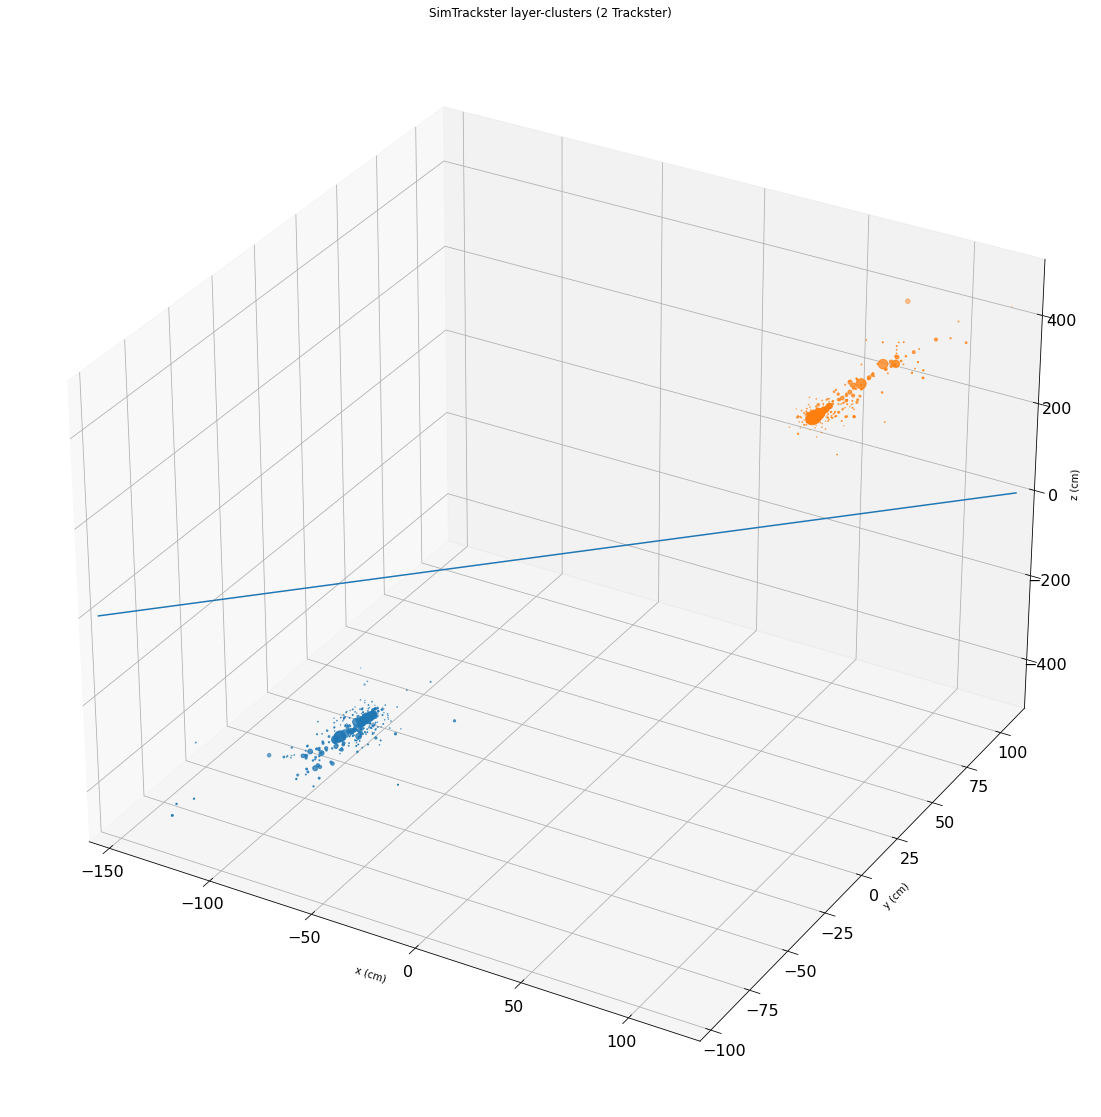

In [14]:
eid = 1

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
ax1.set_zlabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_ylim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_zlim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

X = [ak.min(CP_vx[eid]), ak.max(CP_vx[eid])]
Y = [ak.min(CP_vy[eid]), ak.max(CP_vy[eid])]
Z = [0,0]
ax1.plot(X, Y, Z)#, linewidth=5.)

for x, y, z, e in zip(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid]):
    ax1.scatter(x, y, z, s=8*e)

ax1.set_title(f"SimTrackster layer-clusters ({len(CP_vx[eid])} Trackster)")
plt.show()

In [15]:
%matplotlib widget
eid = 0
tr_id = 0

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
ax1.set_zlabel("z (cm)")

for x, y, z, e, t in zip(CP_vx[eid][tr_id], CP_vy[eid][tr_id], CP_vz[eid][tr_id], CP_ve[eid][tr_id], CP_vt[eid][tr_id]):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='b', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t), size=12)

ax1.set_title(f"SimTrackster layer-clusters ({len(CP_vx[eid][tr_id])} LCs)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Animation

In [16]:
eid = 0
tr_id = 1

deltaT = 0.03 # 30ps
valid_times = CP_vt[eid][tr_id][np.where(CP_vt[eid][tr_id]>-99)]
tmin = min(valid_times)
tmax = max(valid_times)
print('t_min = {:.3f}, t_max = {:.3f}'.format(tmin, tmax))

import pandas as pd

df = pd.DataFrame({"time": np.array(CP_vt[eid][tr_id]),
                   "x" : np.array(CP_vx[eid][tr_id]), 
                   "y" : np.array(CP_vy[eid][tr_id]), 
                   "z" : np.array(CP_vz[eid][tr_id]), 
                   "e" : np.array(CP_ve[eid][tr_id])})
df =  df[df['time']>-98]

nframes = len(df['time'])
times = np.linspace(tmin, tmax, nframes)

t_min = -0.025, t_max = 0.009


In [17]:
%matplotlib widget
plt.style.use('default')

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

def update_graph(num):
    #condition = np.where((CP_vt[eid][tr_id]<=times[n]+deltaT) & (CP_vt[eid][tr_id]>=times[n]-deltaT))
    data=df[(df['time']<=times[num]+deltaT) & (df['time']>=times[num]-deltaT)]
    graph._offsets3d = (data.y, data.x, data.z)
    graph.set_sizes(5*np.array(data.e))
    title.set_text('Single pion, time={:.3f} ns'.format(times[num]))

fig = plt.figure()#dpi=200)
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Single pion')
xlab = ax.set_xlabel('y(cm)')
ax.set_ylabel('x(cm)')
ax.set_zlabel('z(cm)')

#ax.set_ylim(ak.min(CP_vx[eid])-10, ak.max(CP_vx[eid])+10)
#ax.set_xlim(ak.min(CP_vy[eid])-10, ak.max(CP_vy[eid])+10)
#ax.set_zlim(ak.min(CP_vz[eid])-10, ak.max(CP_vz[eid])+10)

data=df[(df['time']<=times[0]+deltaT) & (df['time']>=times[0]-deltaT)]
graph = ax.scatter(data.y, data.x, data.z, s=5*data.e)
#print(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, nframes, 
                               interval=1000, blit=False)

from matplotlib.animation import PillowWriter
#ani.save("singlePion.gif", writer=PillowWriter(fps=1))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## skeleton

In [18]:
from wpca import WPCA, EMPCA

In [19]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def create_tr_skeletons_single_pca(vx, vy, vz, ve, vi, vm, bx, by, bz, be, ev, tr_id, DST_THR=2.5, bubble_size=10, 
                                   NEIGHBOUR_THR=30, ENERGY_RATIO_THR=0.01, MIN_EDGE_LEN=1, PCA_NEIGHBOUR_THR=2, 
                                  secondary_edges = False):
    # Project the points on pca
    edges, nodes = set(), set()
    covered_nodes = set()
    covered_node_idx = []
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f"Reconstruction of a pion in a high-pileup environment\nLayer Clusters")
    ax.set(xlabel="x (cm)", ylabel="y (cm)", zlabel="z (cm)")
    
    tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])

    vxt = CP_vx[eid][tr_id]
    vyt = CP_vy[eid][tr_id]
    vzt = CP_vz[eid][tr_id]
    vet = CP_ve[eid][tr_id]
    vit = CP_vi[eid][tr_id]

    bxt = bx[eid][tr_id]
    byt = by[eid][tr_id]
    bzt = bz[eid][tr_id]
    bet = be[eid][tr_id]
  
    #ax.scatter(vxt, vyt, vzt, s=vet*bubble_size, alpha=0.2, c="m", zorder=-5)  

    # Get distances between the LCs
    dist_matrix = distance_matrix(vxt, vyt, vzt)
    # Calculate PCA
    pca = WPCA(n_components=3)    
    positions = np.array((vxt, vyt, vzt)).T

    vet_array = np.array(vet).reshape(-1,1)
    vet_array = np.tile(vet_array,(1, 3))

    pca.fit(positions, weights = vet_array)
    component = pca.components_[0]
    
    # Barycenter
    b_coord = np.array([bxt, byt, bzt])
    edges.add((tuple(b_coord), tuple(b_coord)))
    nodes.add(tuple(b_coord))
    ax.scatter(bxt, byt, bzt, s=10, c="red", label=f"{len(vet)} LC: {sum(vet):.2f} GeV")

    segment_end = np.array([bxt+component[0],
                            byt+component[1],
                            bzt+component[2]])

    data = [[x,y,z,e,i,j] for x,y,z,e,i,j in zip(vxt, vyt, vzt, vet, vit, range(len(vxt)))]
    # sorted by energy
    data = sorted(data, key=lambda a: -a[3])

    # project each LC to the principal component
    min_p, max_p = b_coord, b_coord
    max_en = max(vet)
    num_lc_above_th = len(np.array(vxt)[np.array(vet) > 2*ENERGY_RATIO_THR*max_en])
    
    small_trackster = False
    if max_en < 1 or num_lc_above_th < 5:
        # If maximum energy of the LCs is lower than 2 GeV or number of layer clusters with at least a ENERGY_RATIO_THR of the maximum energy is less than 5
        small_trackster = True
        print("Small trackster")

    # try create main edges
    for x,y,z,e,i,j in data:

        point = np.array([x, y, z])
        dist, closest_point = project_lc_to_pca(point, b_coord, segment_end)
        
        if e/max_en > ENERGY_RATIO_THR and dist < PCA_NEIGHBOUR_THR:
            # limiting the PCA length
            z_cl = closest_point[2]
            if min_p[2] > z_cl:
                min_p = closest_point
            if max_p[2] < z_cl:
                max_p = closest_point  
                
#         ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="m", zorder=-5)   
    
    
    if np.linalg.norm(min_p-max_p) > 0.5:
    
        if not np.allclose(min_p, b_coord, atol=0.1):
            edges.add((tuple(min_p), tuple(b_coord)))
            nodes.add(tuple(min_p))
            ax.plot([bxt, min_p[0]], [byt, min_p[1]], [bzt, min_p[2]], c='red')    

        if not np.allclose(max_p, b_coord, atol=0.1):
            edges.add((tuple(max_p), tuple(b_coord)))
            nodes.add(tuple(max_p))
            ax.plot([bxt, max_p[0]], [byt, max_p[1]], [bzt, max_p[2]], c='green')
    else:
        min_p, max_p = b_coord, b_coord
        
    # compute times
    dist4t = ((min_p[0] - b_coord[0])**2 + (min_p[1] - b_coord[1])**2 + (min_p[2] - b_coord[2])**2)**0.5
    time1 = (dist4t/29.9792458)
    
    dist4t = ((max_p[0] - b_coord[0])**2 + (max_p[1] - b_coord[1])**2 + (max_p[2] - b_coord[2])**2)**0.5
    time2 = (dist4t/29.9792458)
    
    # plot times
    t_bar=0
    ax.text(min_p[0], min_p[1], min_p[2], '%.3f ns' % (t_bar-time1), size=12) 
    ax.text(max_p[0], max_p[1], max_p[2], '%.3f ns' % (t_bar+time2), size=12)
    
    print('times:', time1, time2)
    #Build secondary edges
    for x,y,z,e,i,j in data:
        
        if e / max_en > ENERGY_RATIO_THR:
            # and not covered by any edge
            point = np.array([x, y, z])
            min_dist, min_edge, closest_point_edge, closest_endpoint =  find_dist_to_closest_edge_set(point, edges)
            #print(min_dist)
            
            if min_dist < DST_THR:
                # LC covered by some edge already
                ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="green", zorder=-5)
                covered_nodes.add((x, y, z))
                covered_node_idx.append(j)  
                continue
            else:
                ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="black", zorder=-5)
                pass

            if not small_trackster and secondary_edges:
                # find neares higher
                # go through all points, if the point is within the Neighbour_threshold
                distances = dist_matrix[j]
                indices = np.argsort(distances)

                for idx in indices:

                    if idx in covered_node_idx and distances[idx] < NEIGHBOUR_THR and vet[idx] > e and abs(vzt[idx]) < abs(z):
                        # found the nearest higher
                        # create an edge - to projection of the nearest higher to the pca
                        #edges[(idx, j)] = (np.array([vxt[idx], vyt[idx], vzt[idx]]), point)
                        ax.plot([vxt[idx], x], [vyt[idx], y], [vzt[idx], z], c='blue')
                        nearest_higher = np.array([vxt[idx], vyt[idx], vzt[idx]])
                        
                        # TODO: check that it lies on the axis!!!!!!!!!!!!!!!
                        dist, closest_point = project_lc_to_pca(nearest_higher, b_coord, segment_end)

                        if not np.allclose(closest_point, point, atol=0.1):
                            edges.add((tuple(closest_point), tuple(point)))
                            nodes.add(tuple(closest_point))
                            nodes.add(tuple(point))
                        ax.plot([closest_point[0], x], [closest_point[1], y], [closest_point[2], z], c='blue')

                        break
        else:
            # if low energy
            pass
            ax.scatter(x, y, z, s=e*bubble_size, alpha=0.2, c="blue", zorder=-5)
    
    edges.remove((tuple(b_coord), tuple(b_coord)))
    set_axes_equal(ax)
    plt.show()
    return edges, nodes, covered_node_idx

In [20]:
%matplotlib widget
eid = 0
tr_id=0
# create internal edges per each trackster
all_event_edges, all_event_nodes, covered_node_idxs = [], [], []
for tr_id in range(len(CP_bx[eid])):    
    plt.style.use('default')
    internal_trackster_edges, internal_trackster_nodes, covered_node_idx = create_tr_skeletons_single_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vi, CP_vm,
                                                                                                          CP_bx, CP_by, CP_bz, CP_be, ev=eid,
                                                                                                          tr_id=tr_id, bubble_size=100, 
                                                                                                          secondary_edges = False)
    #print(internal_trackster_edges)
    all_event_edges.append(internal_trackster_edges)
    all_event_nodes.append(internal_trackster_nodes)
    covered_node_idxs.append(covered_node_idx)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

times: 1.0290420020723834 2.9705300289408125


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

times: 1.6540011802549222 1.297262989226404
